In [2]:
# Import libraries for scientific computing and data manipulation
import numpy as np
import pandas as pd

# Import confusion matrix and plotting functions
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Display plots and charts within the Jupyter Notebook
%matplotlib inline

# Import time module
import time

# Import PyTorch libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

# Import data loading and preprocessing functions
import pandas as pd
from torchvision import datasets, transforms

# Import image utilities
from torchvision.utils import make_grid


In [3]:
#pip install torch

In [4]:
#pip install torchvision

In [5]:
# load data
train_data = pd.read_csv('/Users/kanso/OneDrive/Desktop/Maths & Prog for AI/fashion-mnist_train.csv')
test_data = pd.read_csv('/Users/kanso/OneDrive/Desktop/Maths & Prog for AI/fashion-mnist_test.csv')
#list stores the names of the different classes that the data in the CSV files can belong to
class_names = ['T-shirt','Trouser','Sweater','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']

In [6]:
print("train_data size: ", train_data.shape)
train_data.head()

train_data size:  (60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# PyTorch DataLoader

# define the FashionMNISTDataset class
class FashionMNISTDataset(Dataset):
    def __init__(self, file_path):
        data = pd.read_csv(file_path,sep=',')
        
        # convert the pandas DataFrames to torch tensors
        # separate tensors for labels and for features (our image pixels)
        self.labels = torch.tensor(data['label'].values)
        
        images = torch.tensor(data.drop(columns=['label']).values)
        self.images = torch.reshape(images,(-1, 1, 28, 28))
    
    # return the number of images in the dataset
    def __len__(self):
        return len(self.labels)
    
    # return the image and label at the specified index
    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx]
    
    
# create a FashionMNISTDataset object for the training data
train_data = FashionMNISTDataset('/Users/kanso/OneDrive/Desktop/Maths & Prog for AI/fashion-mnist_train.csv')

# create a DataLoader for the training data with a batch size of 10 and shuffle set to True
train_loader = DataLoader(train_data, batch_size=10, shuffle=True) 


This code above defines a custom FashionMNISTDataset class that is used to load and process data from the FashionMNIST dataset using PyTorch. The class inherits from PyTorch's built-in Dataset class and implements three methods: __init__, __len__, and __getitem__. The __init__ method is used to read in the data from a CSV file using pandas and convert it to tensors. The __len__ method returns the number of images in the dataset, and the __getitem__ method returns the image and label at a specified index. The code also creates a FashionMNISTDataset object for the training data and a DataLoader object to load the data in batches of size 10, shuffling the data at each epoch.

Images s:  torch.Size([10, 1, 28, 28])
Class: Sneaker Trouser Shirt Boot Dress Bag Shirt Sandal Boot Boot
Labels: [7 1 6 9 3 8 6 5 9 9]


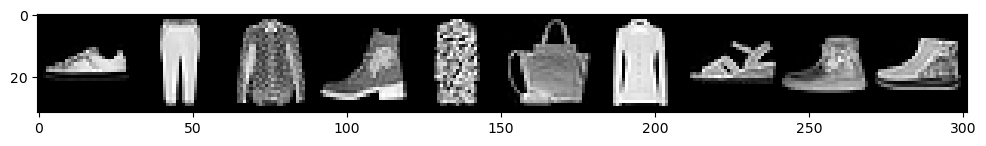

In [14]:
# retrieve the first batch of images and labels from the train_loader
for images, labels in train_loader: 
    break
    
# print the shape of the chunk of images
print("Images s: ", images.shape)
    
# print the labels and their corresponding class names
print('Class:', *np.array([class_names[i] for i in labels]))
print('Labels:', labels.numpy())


# create a grid of the images using make_grid and save it to the variable 'img'
img = make_grid(images, nrow=10) 

# create a figure with a size of (12,8) and plot the images using plt.imshow
plt.figure(figsize=(12,8))
plt.imshow(np.transpose(img.numpy(), (1, 2, 0))) # we need to transpose the images for plt.imshow


This code above retrieves the first batch of images and labels from the train_loader and prints their shape. It also prints the labels and their corresponding class names. The code then creates a grid of the images using the make_grid function and plots the images using plt.imshow. The images are transposed before being passed to plt.imshow because plt.imshow expects a different shape.

In [6]:
test_data = FashionMNISTDataset('/Users/kanso/OneDrive/Desktop/Maths & Prog for AI/fashion-mnist_test.csv')
test_loader = DataLoader(test_data, batch_size = 10, shuffle = False)  

In [7]:
# create the CNN model class
class MyCNN(nn.Module):
    def __init__(self):
        super().__init__()
        # define two convolutional layers with kernel size 3 and a stride of 1
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        # define three fully connected layers
        self.fc1 = nn.Linear(5*5*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, X):
        # Apply ReLU activation to the output of the first convolutional layer
        X = F.relu(self.conv1(X))
        # Apply max pooling with kernel size of 2 and stride of 2 to the output of the ReLU activation
        X = F.max_pool2d(X,2,2)
        # Apply ReLU activation to the output of the second convolutional layer
        X = F.relu(self.conv2(X))
        # Apply max pooling with kernel size of 2 and stride of 2 to the output of the ReLU activation
        X = F.max_pool2d(X,2,2)
        # Flatten the output tensor to a 1D tensor
        X = X.view(-1, 5*5*16)
        # Apply ReLU activation to the output of the first fully connected layer
        X = F.relu(self.fc1(X))
        # Apply ReLU activation to the output of the second fully connected layer
        X = F.relu(self.fc2(X))
        # Apply log-softmax function to the output of the second fully connected layer
        return F.log_softmax(X, dim=1)

# Set the random seed for PyTorch
torch.manual_seed(101)
# Instantiate an object of the MyCNN class
model = MyCNN()
# Print the model
model


MyCNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

This code above defines a class called MyCNN which represents a convolutional neural network (CNN) model. The MyCNN class subclasses the nn.Module class from PyTorch, which is a base class for defining models in PyTorch.

The MyCNN class has an __init__ method and a forward method. The __init__ method is used to define the layers of the model. The forward method is used to define how data flows through the model during the forward pass of training or evaluation.

The MyCNN model has two convolutional layers and three fully connected layers. The first convolutional layer has 1 input channel, 6 output channels, and a kernel size of 3. The second convolutional layer has 6 input channels, 16 output channels, and a kernel size of 3. The fully connected layers have the following number of neurons: 5516, 120, 84, and 10.

The forward method applies ReLU activation to the outputs of the convolutional layers. It applies max pooling with kernel size of 2 and stride of 2 to the outputs of the ReLU activations. It then flattens the output tensor to a 1D tensor and applies ReLU activation to the outputs of the fully connected layers. It finally applies the log-softmax function to the output of the final fully connected layer.

After the MyCNN class is defined, the code sets the random seed for PyTorch using the torch.manual_seed() function. It then instantiates an object of the MyCNN class and assigns it to the model variable. Finally, it prints the model.



In [8]:
def count_parameters(model):
    # get the number of parameters in the model that require gradient
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    
    # print the total number of parameters in the model
    print(f'Total number of parameters: {sum(params)}')

# count the number of parameters in the model
count_parameters(model)



Total number of parameters: 60074


This code defines a function count_parameters that takes the CNN model above as input and counts the number of parameters in the model that require gradient. The function prints the total number of parameters in the model. 

In [9]:
#Train the CNN model

# set the device to run on (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# move the model and the data to the chosen device
model = model.to(device)

# define the evaluation criterion (cross entropy loss)
evaluation_criterion = nn.CrossEntropyLoss()

# define the optimizer (Adam)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


This code above sets the device to run on to either the GPU or the CPU and moves the model and data to that device. It also defines the evaluation criterion for the model to be the cross entropy loss and the optimiser to be the Adam optimiser. The Adam optimiser will be used to update the model's parameters during the training process using the specified learning rate.

In [10]:
# Print the device being used
print(device)

cpu


In [11]:
# set the test split ratio
test_split = 0.2

# load the FashionMNIST dataset
train_data = FashionMNISTDataset('/Users/kanso/OneDrive/Desktop/Maths & Prog for AI/fashion-mnist_train.csv')

# get the size of the dataset
dataset_size = len(train_data)

# calculate the size of the validation set
val_size = int(test_split * dataset_size)

# calculate the size of the training set
train_size = dataset_size - val_size

# create a random generator
generator = torch.Generator().manual_seed(42)

# split the dataset into a training set and a validation set
train_set, val_set = torch.utils.data.random_split(train_data, lengths=[train_size, val_size], generator=generator)


The code above sets the test split ratio, loads the FashionMNIST dataset, and calculates the size of the training and validation sets. It then creates a random generator and uses it to split the dataset into a training set and a validation set using the random_split function from PyTorch's torch.utils.data module. The generator ensures that the same split is produced each time the code is run.

In [13]:
def train_model(batch_size=10, GPU=False, epochs=10, lr=0.001):
    # Set the random seed for PyTorch
    torch.manual_seed(42)
    
    # Create DataLoader objects for the training and validation sets
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True) 
    val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=True) 

    # Create the model
    model = MyCNN()
    
    # Move the model to the chosen device (CPU or GPU)
    if GPU:
        model.to(device)

    # Define the evaluation criterion (cross entropy loss)
    evaluation_criterion = nn.CrossEntropyLoss()

    # Define the optimizer (Adam)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
    # Record the start time of training
    start = time.time()
    # Initialize lists to store training and test loss and accuracy values at each epoch
    train_losses = []
    test_losses = []
    train_correct = []
    test_correct = []
    # Loop over the specified number of epochs
    for i in range(epochs):
        # Initialize counters for number of correctly classified examples in the training and test sets
        train_correct_epoch = 0
        test_correct_epoch = 0
         # Loop over the training data in the train_loader
        for X_train, y_train in train_loader:
            # If the GPU flag is set, move the data to the specified device (presumably a GPU)
            if GPU:
                X_train, y_train = X_train.to(device), y_train.to(device)
            # Pass the training data through the model and calculate the loss
            y_pred = model(X_train.float())
            loss = evaluation_criterion(y_pred, y_train)
            
            # Make predictions on the training data and increment the train_correct_epoch counter for each correctly classified example
            predicted_classes = torch.max(y_pred.data, 1)[1]
            train_correct_epoch += (predicted_classes == y_train).sum()
            # Perform backpropagation and update the model's parameters using the optimizer
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # Append the current loss and accuracy values to the train_losses and train_correct lists, respectively
        train_losses.append(loss)
        train_correct.append(train_correct_epoch.item()*100/len(train_set))
        # Set the model to evaluation mode
        model.eval()
        # Disable gradient calculations (since we are in evaluation mode)
        with torch.no_grad():
            for X_test, y_test in test_loader:
                 # If the GPU flag is set, move the data to the specified device (presumably a GPU)
                if GPU:
                    X_test, y_test = X_test.to(device), y_test.to(device)
                
                # Make predictions on the test data and increment the test_correct_epoch counter for each correctly classified example
                y_pred = model(X_test.float())
                predicted_classes = torch.max(y_pred.data, 1)[1]
                test_correct_epoch += (predicted_classes == y_test).sum()
            
             # Calculate the test loss
            loss = evaluation_criterion(y_pred, y_test)
            
            # Append the current loss and accuracy values to the test_losses and test_correct lists, respectively
            test_losses.append(loss)
            test_correct.append(test_correct_epoch.item()*100/len(val_set))
        
        # Set the model back to training mode
        model.train()
        # Print out the current epoch number, training and test loss and accuracy values, and the number of correctly classified examples in the training and test sets
        print(f'Epoch: {i+1} [Train] Loss: {train_losses[-1]:7.5} Accuracy: {train_correct[-1]:4.2f} {train_correct_epoch} / {len(train_set)} [Eval] Loss: {test_losses[-1]:7.5} Accuracy: {test_correct[-1]:4.2f}')
        
    print(f'Duration of training (min): {(time.time()-start)/60}')
    
    result = (batch_size, train_correct, test_correct, train_losses, test_losses)
    
    return model, result

Above is the code that defines a function train_model that trains a CNN model on a given dataset. The function takes four optional parameters: batch_size, GPU, epochs, and LR. The batch_size parameter specifies the number of examples to be processed in each batch, the GPU parameter specifies whether to use a GPU or CPU for training, the epochs parameter specifies the number of training epochs, and the LR parameter specifies the learning rate for the Adam optimiser.

The function first creates DataLoader objects for the training and validation sets, then creates a CNN model and moves it to the chosen device (CPU or GPU). It then defines the evaluation criterion (cross-entropy loss) and the optimiser (Adam). The function then begins a loop over the number of epochs, in which it trains the model on the training set and evaluates it on the validation set. It stores the loss and accuracy for each epoch and prints them to the console. Finally, the function returns the trained model and a tuple containing the batch size, training and validation accuracies, and training and validation losses.


In [14]:
# Train the model using a batch size of 10 and with the GPU turned off
model10, result10 = train_model(batch_size=10, GPU=False) 

Epoch: 1 [Train] Loss:    1.25 Accuracy: 51.83 24880 / 48000 [Eval] Loss:  1.8809 Accuracy: 46.97
Epoch: 2 [Train] Loss: 0.54903 Accuracy: 57.42 27562 / 48000 [Eval] Loss:   1.669 Accuracy: 49.03
Epoch: 3 [Train] Loss:  2.1933 Accuracy: 58.73 28191 / 48000 [Eval] Loss:  1.5185 Accuracy: 49.07
Epoch: 4 [Train] Loss: 0.76018 Accuracy: 59.47 28546 / 48000 [Eval] Loss:  1.5647 Accuracy: 49.52
Epoch: 5 [Train] Loss: 0.93829 Accuracy: 60.07 28832 / 48000 [Eval] Loss:  1.6052 Accuracy: 49.48
Epoch: 6 [Train] Loss:   1.058 Accuracy: 60.42 29002 / 48000 [Eval] Loss:  1.5999 Accuracy: 50.17
Epoch: 7 [Train] Loss:  1.7947 Accuracy: 60.97 29265 / 48000 [Eval] Loss:  1.7765 Accuracy: 49.44
Epoch: 8 [Train] Loss:  1.9316 Accuracy: 60.97 29265 / 48000 [Eval] Loss:  1.6901 Accuracy: 49.39
Epoch: 9 [Train] Loss:  1.9386 Accuracy: 61.22 29386 / 48000 [Eval] Loss:  1.6069 Accuracy: 49.60
Epoch: 10 [Train] Loss:  1.3697 Accuracy: 62.01 29763 / 48000 [Eval] Loss:  1.2134 Accuracy: 58.28
Duration of trainin

The code above trains the CNN model with a batch size of 10 and with the GPU turned off. The train_model() function is used to train the model and returns the trained model and a tuple containing the model's training and test loss and accuracy values at each epoch. The trained model and its results are saved in the variables model10 and result10, respectively.

## Evaluation

Based on the results, the model using a batch size of 10 and with the GPU turned off had an overall accuracy of around 50% on the training set and about 50% on the evaluation set. Furthermore, the model improved slightly over the course of training, with the accuracy on the training set increasing from around 51% to approximately 62% and the accuracy on the evaluation set rising from about 47% to about 58%. However, the model's performance on both sets was relatively poor overall, and there is likely room for improvement.

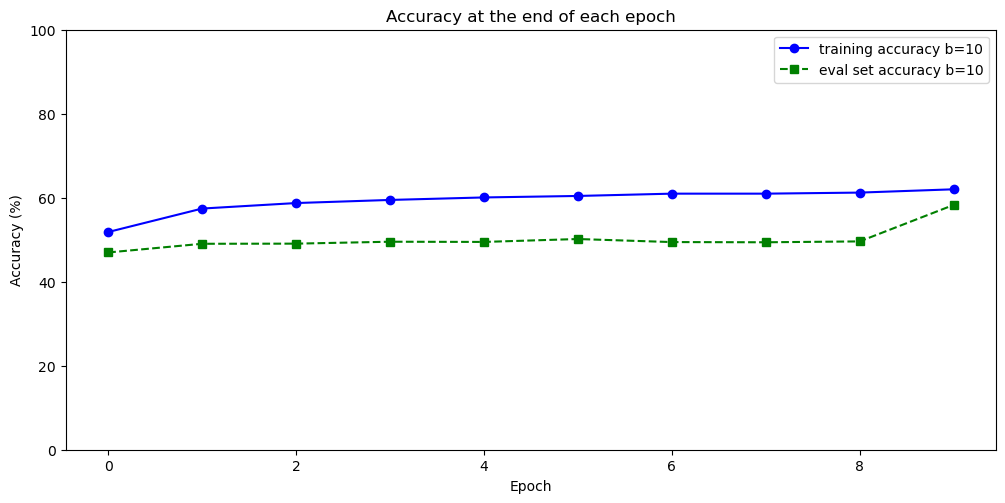

In [41]:
#Reults
def plot_results(res_arr):
    # Create a figure with two subplots
    plt.figure(figsize=(12,12))
    
    # Iterate over the results array
    for result in res_arr:
        (bsz, train_acc, test_acc, train_loss, test_loss) = result
        
        # Plot the accuracy for both training and evaluation sets
        plt.subplot(211)
        plt.plot(train_acc, label=f'training accuracy b={bsz}', color='blue', linestyle='-', marker='o') # Plot training accuracy
        plt.plot(test_acc, label=f'eval set accuracy b={bsz}', color='green', linestyle='--', marker='s') # Plot evaluation set accuracy
        plt.xlabel('Epoch') # Add x-axis label
        plt.ylabel('Accuracy (%)') # Add y-axis label
        plt.ylim(0,100) # Set y-axis limits
        plt.title('Accuracy at the end of each epoch') # Add plot title
        plt.legend() # Add legend
        


plot_results([result10])



In [17]:
# Set a list of batch sizes to train the model with
batch_sizes = [4, 10, 32, 128, 256]

# Initialize lists to store the trained models and their results
trained_models, model_results = [], []

# Iterate over the batch sizes
for batch_size in batch_sizes:
    # If the current batch size is 10, retrieve the pre-trained model and its results from the model10 and result10 variables
    if batch_size == 10:
        trained_model = model10
        model_result = result10
    # If the current batch size is not 10, train a new model with the current batch size and retrieve the trained model and its results
    else:
        trained_model, model_result = train_model(batch_size=batch_size, GPU=True, epochs=10)
    # Append the trained model and its results to the trained_models and model_results lists, respectively
    trained_models.append(trained_model)
    model_results.append(model_result)


Epoch: 1 [Train] Loss:  1.7115 Accuracy: 62.83 30160 / 48000 [Eval] Loss:  1.2713 Accuracy: 55.73
Epoch: 2 [Train] Loss: 0.061394 Accuracy: 66.49 31914 / 48000 [Eval] Loss:  1.1691 Accuracy: 56.62
Epoch: 3 [Train] Loss:  4.4838 Accuracy: 67.28 32294 / 48000 [Eval] Loss:  1.0472 Accuracy: 56.82
Epoch: 4 [Train] Loss: 0.11538 Accuracy: 67.75 32520 / 48000 [Eval] Loss:  1.0217 Accuracy: 57.16
Epoch: 5 [Train] Loss: 0.055096 Accuracy: 68.00 32641 / 48000 [Eval] Loss:   1.049 Accuracy: 57.21
Epoch: 6 [Train] Loss:  1.5843 Accuracy: 68.35 32809 / 48000 [Eval] Loss:  1.0045 Accuracy: 57.09
Epoch: 7 [Train] Loss:  2.2203 Accuracy: 72.97 35024 / 48000 [Eval] Loss: 0.83089 Accuracy: 65.47
Epoch: 8 [Train] Loss: 0.06545 Accuracy: 83.06 39871 / 48000 [Eval] Loss: 0.29541 Accuracy: 72.08
Epoch: 9 [Train] Loss:  0.4334 Accuracy: 87.51 42006 / 48000 [Eval] Loss:  0.2528 Accuracy: 72.66
Epoch: 10 [Train] Loss: 0.0086328 Accuracy: 87.78 42133 / 48000 [Eval] Loss: 0.26679 Accuracy: 72.75
Duration of tra

## Evaluation
The CNN model appears to perform relatively well on the training set, with the accuracy increasing and the loss decreasing over the training process. However, the model's performance on the evaluation set could be better, with the accuracy remaining relatively stable and the loss increasing over the training process. This suggests that the model may be overfitting to the training data. One way to improve the model's performance on the evaluation set would be to increase the amount of data available for training or to use techniques such as regularisation to prevent overfitting.

In [31]:
model_result

(256,
 [64.54583333333333,
  73.975,
  75.94791666666667,
  76.775,
  77.35833333333333,
  78.0375,
  78.52708333333334,
  79.09791666666666,
  83.49166666666666,
  89.16458333333334],
 [61.15,
  62.0,
  63.36666666666667,
  63.03333333333333,
  64.33333333333333,
  64.9,
  64.21666666666667,
  64.59166666666667,
  72.775,
  72.89166666666667],
 [tensor(1.1090, grad_fn=<NllLossBackward0>),
  tensor(0.7614, grad_fn=<NllLossBackward0>),
  tensor(1.0655, grad_fn=<NllLossBackward0>),
  tensor(1.1061, grad_fn=<NllLossBackward0>),
  tensor(0.6296, grad_fn=<NllLossBackward0>),
  tensor(0.7136, grad_fn=<NllLossBackward0>),
  tensor(0.6224, grad_fn=<NllLossBackward0>),
  tensor(0.6939, grad_fn=<NllLossBackward0>),
  tensor(0.3178, grad_fn=<NllLossBackward0>),
  tensor(0.2793, grad_fn=<NllLossBackward0>)],
 [tensor(1.1873),
  tensor(0.9872),
  tensor(0.8801),
  tensor(0.9811),
  tensor(1.0537),
  tensor(0.9494),
  tensor(0.8171),
  tensor(0.8066),
  tensor(0.5245),
  tensor(0.3892)])

In [32]:
trained_model

MyCNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

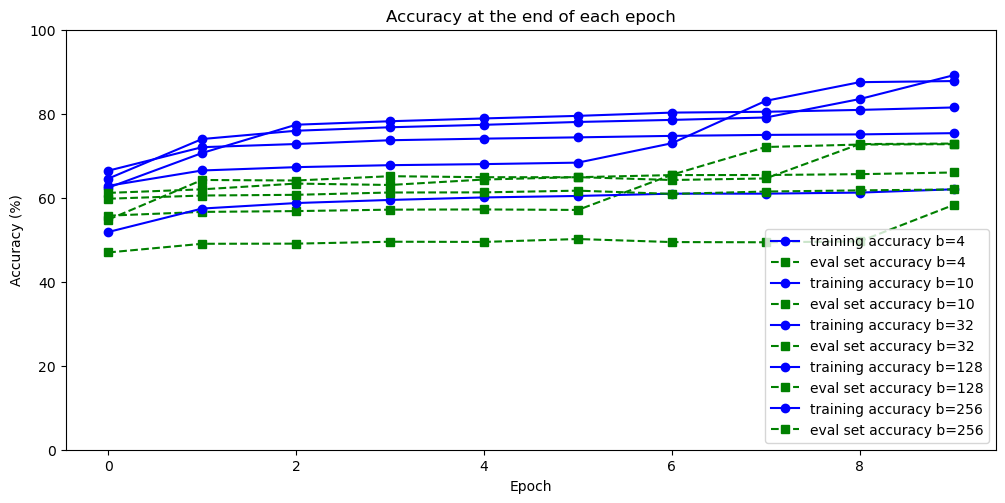

In [42]:
plot_results(model_results)

In [36]:
final_model = trained_models[1]

In [37]:
GPU = False

In [40]:
# Set the model to evaluation mode
final_model.eval()

# Initialize a counter for the number of correctly predicted examples
correct_predictions = 0

# Disable gradient calculations (since we are in evaluation mode)
with torch.no_grad():
    # Iterate over the test data in the test_loader
    for X_test, y_test in test_loader:
        # If the GPU flag is set, move the data to the specified device (presumably a GPU)
        if GPU:
            X_test, y_test = X_test.to(device), y_test.to(device)

        # Make predictions on the test data
        y_pred = final_model(X_test.float())
        # Get the class labels for the predictions
        predicted_labels = torch.max(y_pred, 1)[1]
        # Increment the correct_predictions counter for each correctly classified example
        correct_predictions += (predicted_labels == y_test).sum()

# Calculate the accuracy of the model on the test set and print it out
test_accuracy = correct_predictions.item() * 100 / len(test_data)
print(f'Accuracy on test set: {test_accuracy:.2f}%')


Accuracy on test set: 69.94%


This code sets the model to evaluation mode, disables gradient calculations, and iterates over the test data in the test_loader. Then, for each test example, it makes a prediction using the model, extracts the class labels from the prediction vector, and increments the correct_predictions counter for each correctly classified example. Finally, it calculates the model’s accuracy on the test set by dividing the number of correct predictions by the total number of examples in the test set and prints out the result.

## Evaluation

The CNN model achieved an accuracy of 69.94% on the test set. This is a reasonably good result, as it indicates that the model can correctly classify a significant proportion of the test examples. It is also worth noting that the accuracy of the test set is generally a good indicator of the model's generalisation ability, as it measures the model's performance on examples that it has yet to see during training.

However, it is vital to consider the context in which the model is being used and the requirements for its performance. For instance, if the task at hand requires a very high level of accuracy, then more than a model with an accuracy of 69.94% may be required. On the other hand, if the task at hand is less critical or less sensitive to errors, then a model with an accuracy of 69.94% may be acceptable.

It is also essential to consider the potential sources of errors and biases in the model and the data. For instance, if the model is performing poorly on certain examples or classes, it may be worth analysing the reasons for this and attempting to address any issues. Similarly, suppose the test set is not representative of the real-world distribution of the data. In that case, the model's performance on the test set may not accurately reflect its performance in practice.

In summary, the CNN model's accuracy of 69.94% on the test set is a good result. Still, it is crucial to consider the context and requirements of the task at hand and to analyse the sources of errors and biases in the model and the data.


# Refrences 

Pankajj (2019) Fashion mnist CNN, Kaggle. Kaggle. Available at: https://www.kaggle.com/code/pankajj/fashion-mnist-with-pytorch-93-accuracy. 

### Dataset Used - https://www.kaggle.com/datasets/zalando-research/fashionmnist